<a href="https://colab.research.google.com/github/Warapob/SuperAI_Hackathon-Image-Processing/blob/master/SuperAI_Hackathon012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/KaggleAPI/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-2022-image-processing #download competition dataset
!unzip /content/hackathon-online-2022-image-processing.zip
!mkdir /content/zipfile
!unzip /content/IM_Test.zipfile -d /content/zipfile
!unzip /content/IM_Train.zipfile -d /content/zipfile
!mkdir /content/dataset/
!unzip /content/zipfile/IM_Train.zipfile -d /content/dataset
!unzip /content/zipfile/IM_Test.zipfile -d /content/dataset/test
!rm -r /content/zipfile

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                     9KB  2022-10-06 08:55:25           7061        228  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset              11KB  2022-09-30 04:05:11           5663        184  1.0              
akshaydattatraykhare/car-details-dataset                        Car Details Dataset                                 56KB  2022-10-21 06:11:56           1429         32  1.0              
whenamancodes/students-performance-in-exams                     S

## **Import and Preprocess Dataset**
Do an image augmentation.

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/dataset/train'
w ,h = 150,150

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(w, h),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        subset='training')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(w, h),
        batch_size=64,
        class_mode='categorical',
        subset='validation')

Found 58609 images belonging to 10 classes.
Found 14648 images belonging to 10 classes.


Random an image from ImageGenerator

1

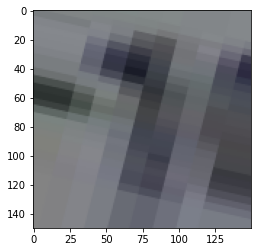

In [ ]:
randint = np.random.randint(0,len(train_generator[0][0]))
plt.imshow(np.array(train_generator[0][0][randint]))
train_generator[0][1][randint].argmax()

## **Prepare Model**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(learning_rate=1e-4),
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 256,
            epochs = 350,
            validation_steps = 50,
            verbose = 1)

model.save('/content/drive/MyDrive/saved_model/03model')
model.save('/content/drive/MyDrive/saved_model/03model/03model.h5')

Epoch 1/350
256/256 [==============================] - 105s 369ms/step - loss: 2.2402 - accuracy: 0.1915 - val_loss: 2.2269 - val_accuracy: 0.1866
Epoch 2/350
256/256 [==============================] - 94s 366ms/step - loss: 2.1436 - accuracy: 0.2480 - val_loss: 2.1001 - val_accuracy: 0.2628
Epoch 3/350
256/256 [==============================] - 92s 361ms/step - loss: 2.0179 - accuracy: 0.3052 - val_loss: 1.9799 - val_accuracy: 0.3113
Epoch 4/350
208/256 [=======================>......] - ETA: 14s - loss: 1.9170 - accuracy: 0.3465

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
plot_loss_acc(history)

In [ ]:
from PIL import Image

def jsonCustomFormatter(data):
    filename= []
    for name in range(len(data)):
        for bbox in range(len(data[name]['bboxes'])):
            _name = data[name]['filename'].split('.')[0]+ "_" + str(data[name]['bboxes'][bbox]['bbox_id'])
            filename.append(_name)

    bboxes= []
    # (left, top, right, bottom)
    for name in range(len(data)):
        for bbox in range(len(data[name]['bboxes'])):
            _coor = []
            _coor.append(data[name]['bboxes'][bbox]['x1'])
            _coor.append(data[name]['bboxes'][bbox]['y1'])
            _coor.append(data[name]['bboxes'][bbox]['x2'])
            _coor.append(data[name]['bboxes'][bbox]['y2'])
            bboxes.append(_coor)

    return filename,bboxes


def normImg(imgArray):
  imgArray = imgArray / 255.
  return imgArray


def loadTestData(path,test_filename,bboxes,w=300,h=300,):

    test_img = []

    for ele in range(len(test_filename)):
      img = Image.open(os.path.join(path,str(test_filename[ele].split('_')[0]))+".png")
      img = img.crop(bboxes[ele])
      img = img.resize((w,h))
      img = np.array(img)
      img = normImg(img)
      test_img.append(img)

    return test_img

In [ ]:
import json
json_path = '/content/dataset/test/IM_Test/IM_Test.json'
# Opening JSON file
f = open(json_path)
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [ ]:
filename,bboxes = jsonCustomFormatter(data=data)
len(filename),len(bboxes)

In [ ]:
test_path = '/content/dataset/test/IM_Test/IM_Test'
test_img = loadTestData(test_path,filename,bboxes ,w=w,h=h)
test_img = np.array(test_img)

In [ ]:
pred = model.predict(test_img)

In [ ]:
pred_res = [x.argmax() for x in pred]

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Submit/IM_Submit.csv')
df['class'] = pred_res

In [ ]:
df.to_csv('/content/drive/MyDrive/Submit/IM_Submit03.csv',index=False)

In [ ]:
# !kaggle competitions submit -c hackathon-online-2022-image-processing -f /content/drive/MyDrive/Submit/IM_Submit03.csv -m "version2"